In [197]:
import requests
import datetime
import numpy as np

In [132]:
headers = {
  'Accept': 'application/json'
}
 
r = requests.get('https://api.carbonintensity.org.uk/intensity/{from}/fw24h', params={"from":"2017-08-25T12:35Z"}, headers = headers)

print(r.json())

{'error': {'code': '400 Bad Request', 'message': 'Please enter a valid datetime in ISO8601 format YYYY-MM-DDThh:mmZ e.g. /intensity/2017-08-25T15:30Z/fw24h'}}


In [133]:
r = requests.get('https://api.carbonintensity.org.uk/intensity/2022-10-22T12:35Z/fw24h', headers = headers)
r = r.json()

In [134]:
print(r)

{'data': [{'from': '2022-10-22T12:30Z', 'to': '2022-10-22T13:00Z', 'intensity': {'forecast': 156, 'actual': 167, 'index': 'moderate'}}, {'from': '2022-10-22T13:00Z', 'to': '2022-10-22T13:30Z', 'intensity': {'forecast': 162, 'actual': 174, 'index': 'moderate'}}, {'from': '2022-10-22T13:30Z', 'to': '2022-10-22T14:00Z', 'intensity': {'forecast': 163, 'actual': 185, 'index': 'moderate'}}, {'from': '2022-10-22T14:00Z', 'to': '2022-10-22T14:30Z', 'intensity': {'forecast': 168, 'actual': 198, 'index': 'moderate'}}, {'from': '2022-10-22T14:30Z', 'to': '2022-10-22T15:00Z', 'intensity': {'forecast': 187, 'actual': 203, 'index': 'moderate'}}, {'from': '2022-10-22T15:00Z', 'to': '2022-10-22T15:30Z', 'intensity': {'forecast': 207, 'actual': 210, 'index': 'high'}}, {'from': '2022-10-22T15:30Z', 'to': '2022-10-22T16:00Z', 'intensity': {'forecast': 216, 'actual': 213, 'index': 'high'}}, {'from': '2022-10-22T16:00Z', 'to': '2022-10-22T16:30Z', 'intensity': {'forecast': 230, 'actual': 217, 'index': 'hig

In [135]:
import pandas as pd

In [136]:
data = pd.json_normalize(r['data'], max_level=1)
data = data.drop(['to', 'intensity.actual', 'intensity.index'], axis = 1)
data = data.set_index('from')
data = data.reset_index()
data['from'] = pd.to_datetime(data['from'], format = '%Y-%m-%dT%H:%MZ')
smallest = data.nsmallest(3,"intensity.forecast")
print(smallest)

                  from  intensity.forecast
47 2022-10-23 12:00:00                 146
46 2022-10-23 11:30:00                 149
0  2022-10-22 12:30:00                 156


In [137]:
smallest.to_json()

'{"from":{"47":1666526400000,"46":1666524600000,"0":1666441800000},"intensity.forecast":{"47":146,"46":149,"0":156}}'

{'width': 864.0,
 'height': 720.0,
 'axes': [{'bbox': (0.125, 0.125, 0.775, 0.755),
   'xlim': (19287.471875, 19288.548958333333),
   'ylim': (141.1, 248.9),
   'xdomain': [(2022, 9, 22, 11, 19, 30, 0.0), (2022, 9, 23, 13, 10, 30, 0.0)],
   'ydomain': (141.1, 248.9),
   'xscale': 'date',
   'yscale': 'linear',
   'axes': [{'position': 'bottom',
     'nticks': 9,
     'tickvalues': None,
     'tickformat_formatter': '',
     'tickformat': None,
     'scale': 'linear',
     'fontsize': 10.0,
     'grid': {'gridOn': False},
     'visible': True},
    {'position': 'left',
     'nticks': 7,
     'tickvalues': None,
     'tickformat_formatter': '',
     'tickformat': None,
     'scale': 'linear',
     'fontsize': 10.0,
     'grid': {'gridOn': False},
     'visible': True}],
   'axesbg': '#FFFFFF',
   'axesbgalpha': None,
   'zoomable': True,
   'id': 'el7357140410878059184',
   'lines': [{'data': 'data01',
     'xindex': 0,
     'yindex': 1,
     'coordinates': 'data',
     'id': 'el73571404

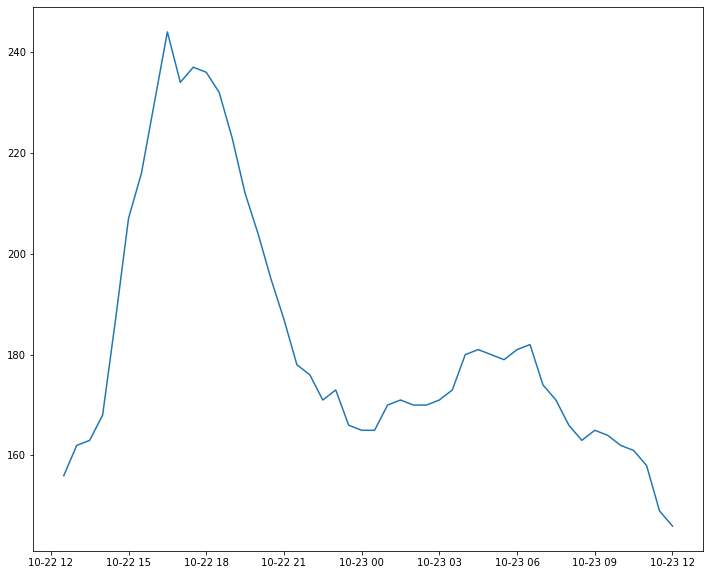

In [138]:
import matplotlib.pyplot as plt
import mpld3
fig = plt.figure(figsize =(12, 10))
plt.plot(data["from"], data["intensity.forecast"])
mpld3.fig_to_dict(fig)


In [212]:
date = "2022-10-22T18:50Z"
duration = 1
url = 'https://api.carbonintensity.org.uk/intensity/' + date + '/fw24h'
r = requests.get(url, headers = headers)
r = r.json()
data = pd.json_normalize(r['data'], max_level=1)
data = data.drop(['to', 'intensity.actual', 'intensity.index'], axis = 1)
data = data.set_index('from')
#data = data.reset_index()
data.index = pd.to_datetime(data.index, format = '%Y-%m-%dT%H:%MZ')
rolling = data.rolling(int(duration/0.5) )
#print(rolling.mean())
#print(len(rolling.mean()))
print(data.head())
rolling_mean = rolling.mean()
print(rolling_mean.head())
shifted = rolling_mean.shift(-duration*2, freq=datetime.timedelta(seconds=1800))
print(shifted.head())
without = pd.DataFrame(shifted.iloc[duration*2:])
print(without.head())
without["intensity.forecast"] = without["intensity.forecast"].round(0).astype(int)
print(without)

                     intensity.forecast
from                                   
2022-10-22 18:30:00                 212
2022-10-22 19:00:00                 202
2022-10-22 19:30:00                 205
2022-10-22 20:00:00                 196
2022-10-22 20:30:00                 183
                     intensity.forecast
from                                   
2022-10-22 18:30:00                 NaN
2022-10-22 19:00:00               207.0
2022-10-22 19:30:00               203.5
2022-10-22 20:00:00               200.5
2022-10-22 20:30:00               189.5
                     intensity.forecast
from                                   
2022-10-22 17:30:00                 NaN
2022-10-22 18:00:00               207.0
2022-10-22 18:30:00               203.5
2022-10-22 19:00:00               200.5
2022-10-22 19:30:00               189.5
                     intensity.forecast
from                                   
2022-10-22 18:30:00               203.5
2022-10-22 19:00:00               200.5


{'width': 864.0,
 'height': 720.0,
 'axes': [{'bbox': (0.125, 0.125, 0.775, 0.755),
   'xlim': (19287.722916666666, 19288.777083333334),
   'ylim': (135.0, 245.0),
   'xdomain': [(2022, 9, 22, 17, 21, 0, 0.0), (2022, 9, 23, 18, 39, 0, 0.0)],
   'ydomain': (135.0, 245.0),
   'xscale': 'date',
   'yscale': 'linear',
   'axes': [{'position': 'bottom',
     'nticks': 9,
     'tickvalues': None,
     'tickformat_formatter': '',
     'tickformat': None,
     'scale': 'linear',
     'fontsize': 10.0,
     'grid': {'gridOn': False},
     'visible': True},
    {'position': 'left',
     'nticks': 8,
     'tickvalues': None,
     'tickformat_formatter': '',
     'tickformat': None,
     'scale': 'linear',
     'fontsize': 10.0,
     'grid': {'gridOn': False},
     'visible': True}],
   'axesbg': '#FFFFFF',
   'axesbgalpha': None,
   'zoomable': True,
   'id': 'el7357140410894268064',
   'lines': [{'data': 'data01',
     'xindex': 0,
     'yindex': 1,
     'coordinates': 'data',
     'id': 'el7357

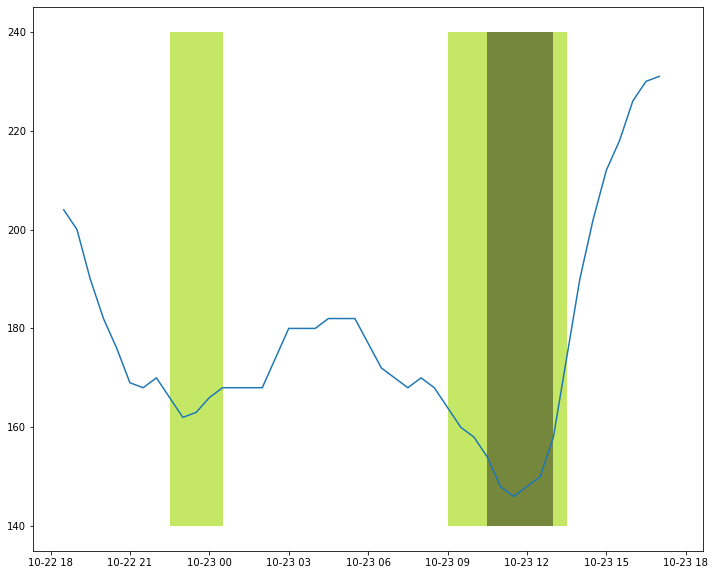

In [214]:
fig = plt.figure(figsize =(12, 10))
without = without.reset_index()
#print(without['from'])
plt.plot(without["from"], without["intensity.forecast"])
min_value = without['intensity.forecast'].min()
max_value = without['intensity.forecast'].max()
for step, value in without[['from','intensity.forecast']].values:
    steppy = step.to_pydatetime()
    if value < min_value + (max_value-min_value)*0.125:
        color = (0.46, 0.53, 0.24) # dark green
    elif value < min_value + (max_value-min_value)*0.25:
        color = (0.77, 0.91, 0.4) # light green
    else:
        color = (1,1,1)
    plt.fill_betweenx(np.array([140,240]),steppy, steppy+datetime.timedelta(seconds=1800),facecolor=color,alpha=1)
mpld3.fig_to_dict(fig)

In [200]:
rolling.mean().nsmallest(3,"intensity.forecast")

,intensity.forecast
from,
2022-10-23 12:30:00,146.0
2022-10-23 13:00:00,147.5
2022-10-23 12:00:00,148.0
